<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Robert Renecker

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.  

$$(\frac{28}{40})(\frac{0}{4}) + (\frac{1}{6})(\frac{10}{40}) + (\frac{2}{40})(\frac{1}{20})$$
**ANS: .4416**  


**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

**ANS: .94339**

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

**ANS: No, not independent**  

$$ \text{ P(S}\mid  R_{5} \text{)}  = \frac{ \text{P(}R_{5} \cap \text{S)}}{\text{P(S)}}$$

$$ \frac{ \text{P(}R_{5} \cap \text{S)}}{\text{P(S)}} \rightarrow \frac{(1/6)(10/40)}{(10/40)(1/6) + (2/40)(1/20)}(10/40) $$

$$ \text{The above shows that P(R5 } \cap \text{S) does not equal P(R5)P(S)} $$


**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

$$ \frac{(28/40)(1)}{(28/40)+(4/6)((10/40)+(4/20)(2/40)} $$
**ANS: .7984790** 


**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

In [215]:
def prob_four(n):
    temp = ( (28 / 40) / ( (28 / 40) + (1/4)*(2/3) + (1/10)*(1/5)) );
    tempForm = ( (28/40) / ( (28/40) + (4/6)**n * (1/4) + (4/20)**n * (2/40) ) )
    
    # your code goes here!
    return tempForm;

prob_four(5)

0.9550605655503714

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [220]:
for i in range(1,11):
    j = prob_four(i);
    
    print("Probability with n = %d is %f" % (i,j ));
    
print("Thus, minimum of n=5 is needed to assume 95% chance of your die being a four sided die.");

Probability with n = 1 is 0.798479
Probability with n = 2 is 0.860891
Probability with n = 3 is 0.903839
Probability with n = 4 is 0.934002
Probability with n = 5 is 0.955061
Probability with n = 6 is 0.969595
Probability with n = 7 is 0.979524
Probability with n = 8 is 0.986256
Probability with n = 9 is 0.990795
Probability with n = 10 is 0.993845
Thus, minimum of n=5 is needed to assume 95% chance of your die being a four sided die.


***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

(1/4)(1/4) + (1/3)(1/4)  
**ANS: .1458**

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

**ANS: .625**

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
**ANS: .25**
* Why:  
$$ \text{3 different place, or 3 different outcomes of them meeting} \rightarrow 3*(1/4*1/3)$$
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?
**ANS:  .057 **
* Why:
    Every outcome where the Hill is the final destination for oscar is .2083 repeating.
    Every outcome where the Hill is the final destination for Stella is .2777 repeating.
    Thus, due to it being two disjoin events, the final product of those two values is .2777*.2083 = .057

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

//Make a class with a dictionary of connected nodes and also the probability to go to one of the random nodes (1/n). 

In [239]:
mapDic = {'E':['R','G','L','C'], 'R':['G', 'E'], 'G':['E','L','H','R'], 'L':['G','E','C','H'], 'C':['E','L','H'], 'H':['G','L','C']}

#part A:
libraryCount = 0;
for i in range(10000):
    firstLocation = np.random.choice(mapDic['E']);
    secondLocation = np.random.choice(mapDic[firstLocation]);
    if secondLocation == 'L':
        libraryCount += 1;
print("1: Probability Oscar will end up at library after two turns is: %f" %(libraryCount/10000));

#Part B: 
gymFirstCount = 0;
gymSecondCount = 0;
for i in range(10000):
    firstLocation = np.random.choice(mapDic['R'])
    secondLocation = np.random.choice(mapDic[firstLocation]);
    if firstLocation == 'G':
        gymFirstCount += 1;
    if secondLocation == 'G':
        gymSecondCount += 1;
print("Liklihood she got to gym first is: %f" % (gymFirstCount/10000))
print("Likelihood she got to gym on secons is: %f" % (gymSecondCount/10000));
print("2: total probability she got to the gym on first or second is %f " % (gymFirstCount/10000 + gymSecondCount/10000));


#Part C
#Stella leaves from hill
#oscar leaves from Engineering
firstTogetherCount = 0;
secondTogetherCount = 0;
for i in range(10000):
    stellaFirstLocation = np.random.choice(mapDic['H']);
    oscarFirstLocation = np.random.choice(mapDic['E']);
    stellaSecondLocation = np.random.choice(mapDic[stellaFirstLocation]);
    oscarSecondLocation = np.random.choice(mapDic[oscarFirstLocation]);
    
    if stellaFirstLocation == oscarFirstLocation:
        firstTogetherCount += 1;
    if oscarSecondLocation == stellaSecondLocation == 'H':
        secondTogetherCount += 1;
print("3a: the likelihood of them appearing at the same destination after after they take their first position change is %f " % (firstTogetherCount / 10000));
print("3c: Likelihood of them appearing at the hill after 2 moves is: %f" % (secondTogetherCount / 10000));

1: Probability Oscar will end up at library after two turns is: 0.145400
Liklihood she got to gym first is: 0.491800
Likelihood she got to gym on secons is: 0.127700
2: total probability she got to the gym on first or second is 0.619500 
3a: the likelihood of them appearing at the same destination after after they take their first position change is 0.244100 
3c: Likelihood of them appearing at the hill after 2 moves is: 0.058900


***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

Sample space = {HH, MM, MH}

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

P(T|E) = $$\frac{(p)^1*(1-q)^1}{(p^1*(1-q)^1)+(q^1*(1-p)^1)}$$ 

**Part C**: Explain why events $C$ and $T$ are independent. 

First off, P(C|T) = P(C) and same for P(T|C) =P(T)  
To show this, we can say that
P(ends after first round)^compliment | duel continues after fisrt round) = 1-p(ends after first round) = P(ends after first round ^ compliment) 
In words: Probability of the duel ending after the first round is dependent on Tony or Dan winning. The probability of The duel continuing after the first round is 


**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) P(T \mid C)$. 

$$ P(T) = P(T|E)P(E) + P(T|C)P(C) $$
$$ \textbf{thus, we know P(T|E)P(E) is p(1-q) due to it being a one time occurence... we need to solve for P(C)} $$
$$ \textbf{we have: } P(T) = p(1-q)+P(T|C)P(C) \rightarrow P(C) \rightarrow \textbf {sample space of C is (we only want HH or MM)}{HH, MM, HM, MH}$$
Choose the two from sample space that will give outcome of C, then solve for P(C)  
$$P(C) \rightarrow p*q + (1-q)(1-p) \rightarrow 2pq - p-q + 1$$

finally, putting them together  
P(T) = p(1-q)+(2pq-p-q+1)P(T|C)

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

P(T|C) = P(T), we can use algebra on the final equation from part D to solve for P(T).  
P(T) = p(1-q)+(2pq-p-q+1)P(T)  
P(T) - ( 2pq-p-q+1 )(P(T)) = p(1-q)  
P(T) * (1 - (2pq-p-q+1)) = p(1-q)
Then take everything that's not P(T) to the right 
$$ P(T) = \frac{p(1-q)}{-2pq+q+p} $$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

B is the chance that the duelw ill end after the first round  

E is the chance that tony will win given the round isn't the first.

Since P(T|C) and P(T) are independent of each other, we also know that P(T|E) and P(E) are independent of each other. Thus Tonys chance of winning wont change over time, it will be the exact same. The same rule can apply to rolling a six on round 50 of rolling a dice, it won't matter if it was the first round or the 50th. The chance of rolling a 6 will stay the same.

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

In the system of total probability, we needed to find P(T|C) but since we could do that given P(T) (using total sums) then we could effectively solve for the sequence of Tony Winning given p and q. 

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [168]:
def miniopoly_turn(location, cash):
    #roll two dice

    diceRolls = [np.random.randint(1,7) for i in range(2)];
    rollSum = sum(diceRolls);
    if location == 30:
            if diceRolls[0] != diceRolls[1]:
                cash -= 20;
                return(location,cash);
            else:
     
                location = 10+rollSum;
    else:
        location += rollSum;
        
    if location >= 40:
        location = location%40;
        cash += 200;
    if location == 30:
        #print("go to jail");
        return(location,cash);
    elif location in [2,7,17,22,33,36]:
        #Draw a card
        cardResult = np.random.choice([-100,-50,50,100,200]);
        #print("You landed on square %d" % location);
        #print("you chose card %d , meaning your cash went from %d to %d"% (cardResult, cash, cash+cardResult));
        cash += cardResult;
    else:
        if location in [0,10,20]:
            return(location, cash);
        cash -= location;

    if cash <= 0:
    
        #print("Game ended, please stop calling this function");
        return (-1, cash)



    # your code goes here!

    return location, cash


**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 


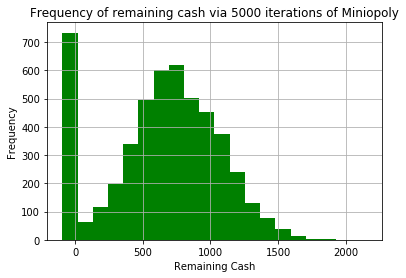

In [169]:
frequency_cash = [];
jailCount = 0;
jailAndLost = 0;
for i in range(5000):
    location = 0;
    turn = 0;
    cash = 200;
    jailTrue = 0;
    while turn<30 and cash >0:
        location, cash = miniopoly_turn(location,cash);
        if location == 30:
            jailTrue=1;
        turn+= 1;
    if jailTrue == 1:
        if turn<30:
            jailAndLost += 1;
        jailCount += 1;
    frequency_cash.append(cash);
n, bins, patches = plt.hist(frequency_cash, bins=20, facecolor='green', range=[min(frequency_cash),max(frequency_cash)]);

plt.xlabel('Remaining Cash');
plt.ylabel('Frequency');
plt.title("Frequency of remaining cash via 5000 iterations of Miniopoly");
plt.grid(True);
plt.show();
        

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [170]:
lostGames = sum(i<=0 for i in frequency_cash);
wonGames = sum(i>0 for i in frequency_cash);
print(jailCount);

#thus probability lostGames/(lostgames+wonGames)
print("Probability is %f" % (lostGames/(lostGames+wonGames)));

2617
Probability is 0.145600


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  


In [171]:

#probability they lost given they went to jail at least once
#solved by doing numerator: jail and lost 
#                denominator: total went to jail
probLostGivenJail = (jailAndLost / jailCount)
print("Probability that they lost within the first 30 turns GIVEN that they went to jail at least once is %f " % (probLostGivenJail));
print("Thus, you are less likely to lose if u go to jail");


Probability that they lost within the first 30 turns GIVEN that they went to jail at least once is 0.194115 
Thus, you are less likely to lose if u go to jail


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [172]:
#given they lost
#what's the probability that the player has gone to jail
pWentToJailGivenLost = (probLostGivenJail * jailCount/(wonGames+lostGames)) / (lostGames/(wonGames+lostGames));

print(jailAndLost/lostGames);

0.6978021978021978


***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


In [166]:
print("The probability(C) is %f" % (16/36));

The probability(C) is 0.444444


**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [173]:
closeCount = 0;
for i in range(10000):
    diceRolls = [np.random.randint(1,7) for i in range(2)]
    if np.absolute(diceRolls[0]-diceRolls[1]) <= 1:
        closeCount += 1;
print("Probability of C in 10000 instances is %f " % (closeCount / 10000));
    

Probability of C in 10000 instances is 0.442500 


**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

0
Probability of C in 10000 instances is 0.447760 
Probability of C in 10000 instances is 0.444000 
Probability of C in 10000 instances is 0.441680 
Probability of C in 10000 instances is 0.445760 
Probability of C in 10000 instances is 0.443080 
Probability of C in 10000 instances is 0.442760 
Probability of C in 10000 instances is 0.445040 
Probability of C in 10000 instances is 0.443000 
Probability of C in 10000 instances is 0.439500 
Probability of C in 10000 instances is 0.444000 


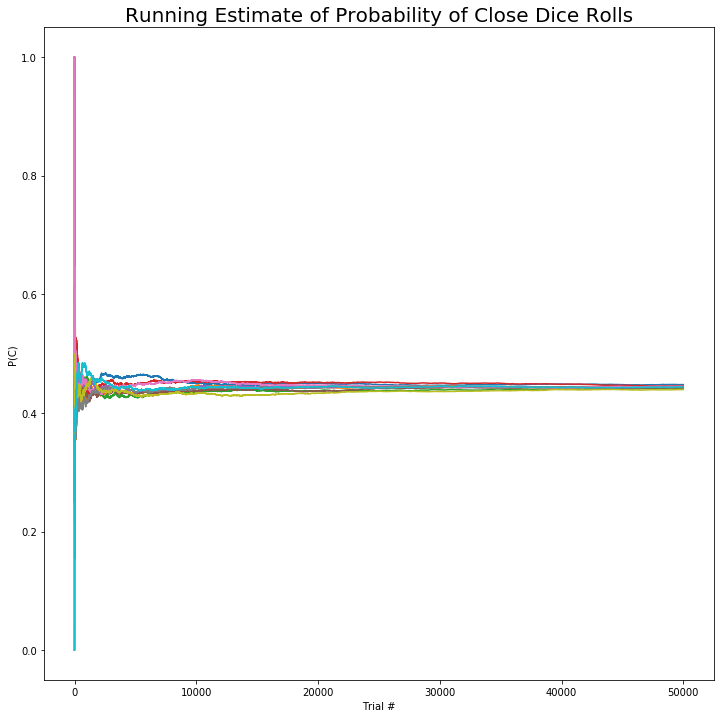

In [199]:
predictions = np.zeros((10,50000));
print(len(predictions[0][0:0]));
for j in range(10):
    closeCount = 0;
    for i in range(50000):
        diceRolls = [np.random.randint(1,7) for i in range(2)]
        if np.absolute(diceRolls[0]-diceRolls[1]) <= 1:
            closeCount += 1;
        predictions[j][i] = (closeCount / len(predictions[j][0:i+1]));
    print("Probability of C in 10000 instances is %f " % (closeCount / 50000));
    
fig, ax = plt.subplots(figsize=(12,12))
for row,col in enumerate(predictions):
    ax.plot(col);

ax.set_title("Running Estimate of Probability of Close Dice Rolls", fontsize=20)
plt.xlabel("Trial #");
plt.ylabel("P(C)");


**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)